## Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [3]:
data = pd.read_csv("E:\Customer churn analysis\Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Preprocessing in the data

In [5]:
# drop unnecessary columns

data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'],inplace = True)

In [6]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#check null data 
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:

# Get minimum values for each column
min_values = data.min()

# Get maximum values for each column
max_values = data.max()

print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

# this will help us when we will deploy our model for the user input data

Minimum values:
 CreditScore           350
Geography          France
Gender             Female
Age                    18
Tenure                  0
Balance               0.0
NumOfProducts           1
HasCrCard               0
IsActiveMember          0
EstimatedSalary     11.58
Exited                  0
dtype: object

Maximum values:
 CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
Exited                     1
dtype: object


# Data Visualization

[]

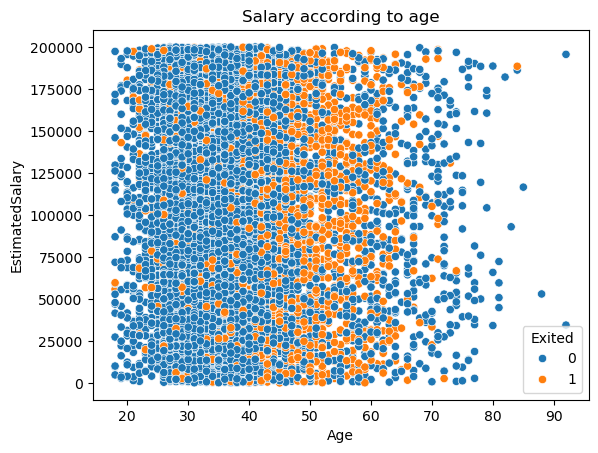

In [9]:
sns.scatterplot(data=data, x='Age',y='EstimatedSalary',hue='Exited')
plt.title("Salary according to age")
plt.plot()

Text(0.5, 1.0, 'Churn vs Stay by city ')

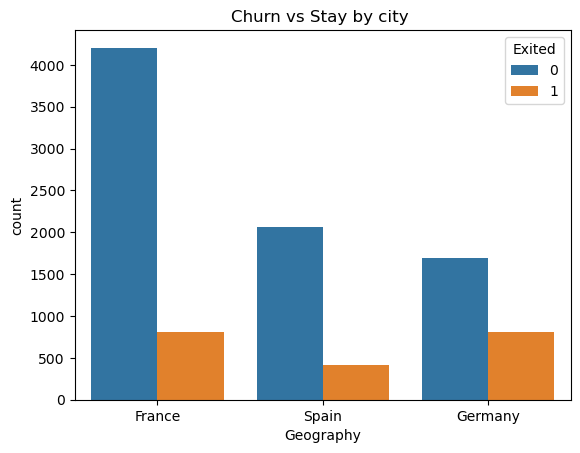

In [10]:
sns.countplot(x='Geography',data=data,hue='Exited') 
plt.title("Churn vs Stay by city ")

## 0 means - customer has stayed with company
## 1 means - customer leave the company

Text(0.5, 1.0, 'Count of Churn vs Stay ')

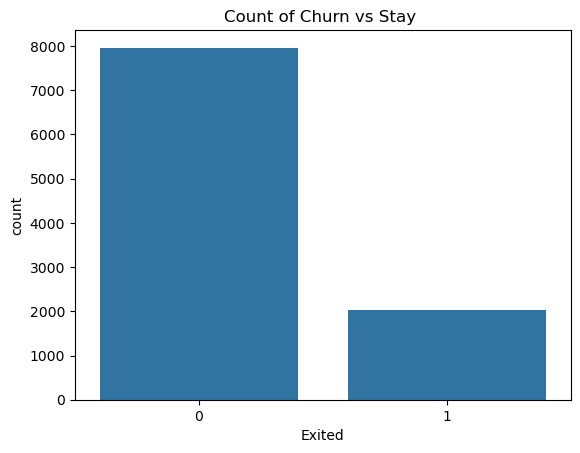

In [11]:
sns.countplot(x='Exited', data=data)
plt.title("Count of Churn vs Stay ")

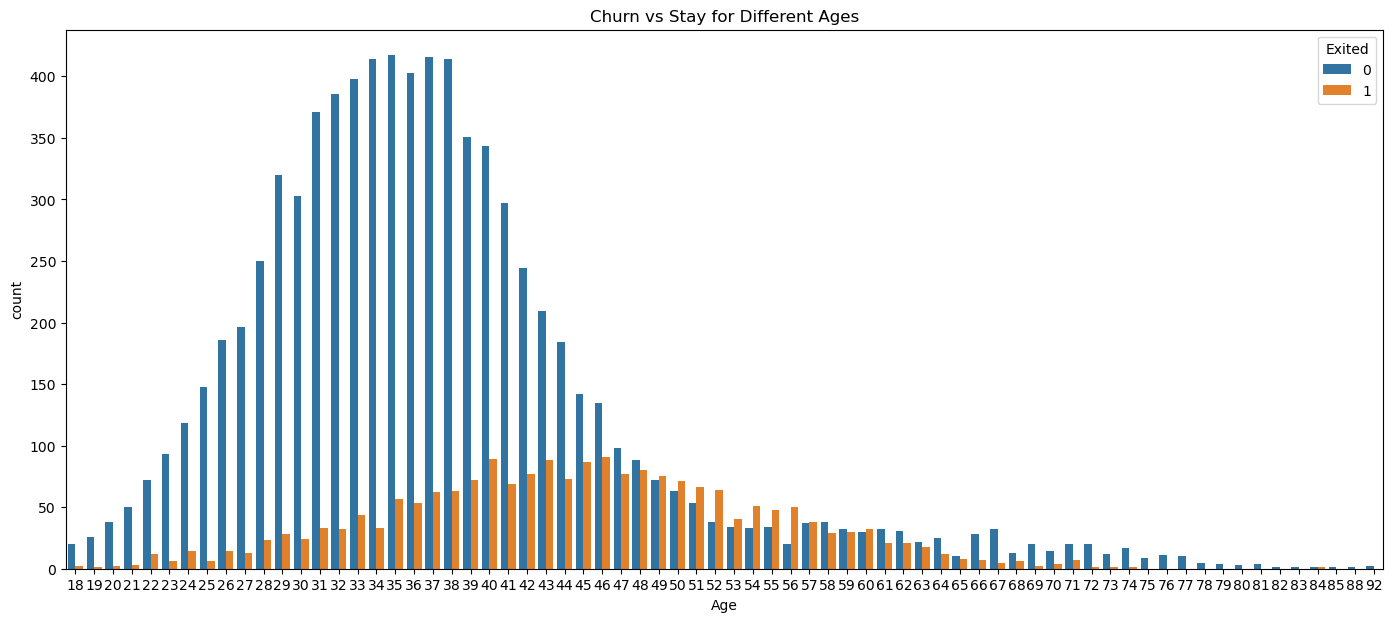

In [12]:
plt.figure(figsize=(17,7))

sns.countplot(x='Age', hue='Exited', data=data)
plt.title('Churn vs Stay for Different Ages')
plt.show()


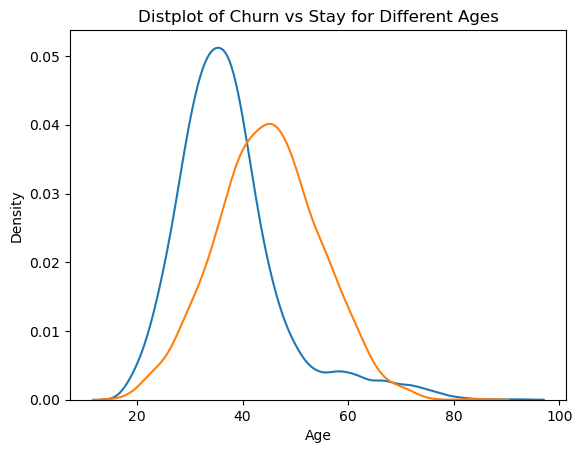

In [13]:
#plt.figure(figsize=(17,7))

#sns.distplot(data['Age'],hist=False)
sns.distplot(data[data['Exited']==0]['Age'],hist=False)
sns.distplot(data[data['Exited']==1]['Age'],hist=False)
plt.title('Distplot of Churn vs Stay for Different Ages')
plt.show()


# Check Outliers

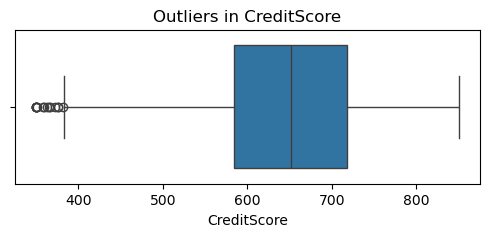

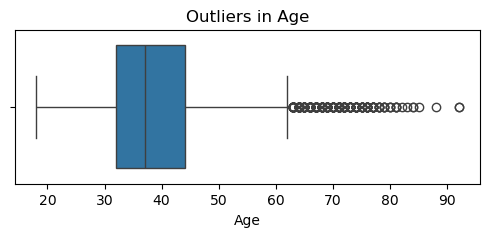

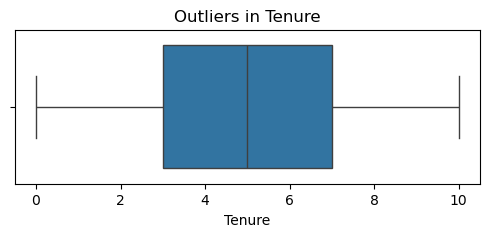

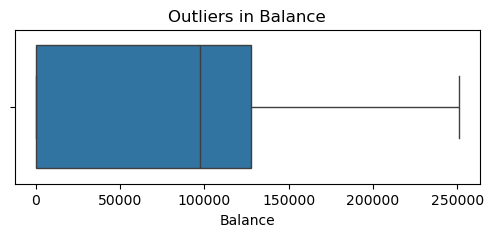

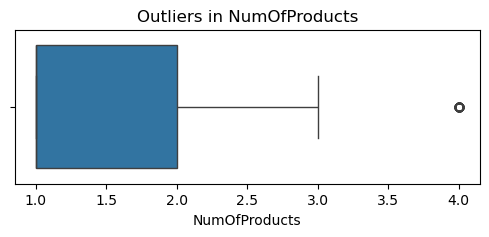

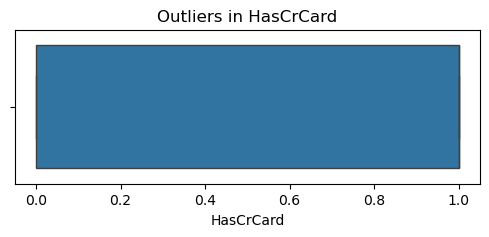

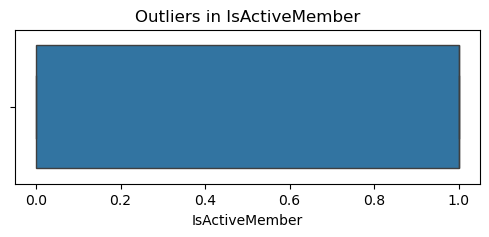

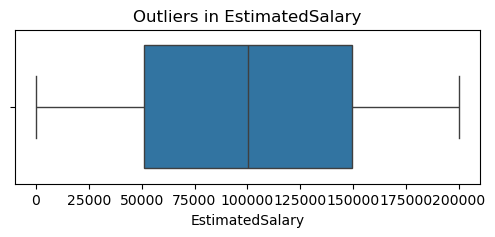

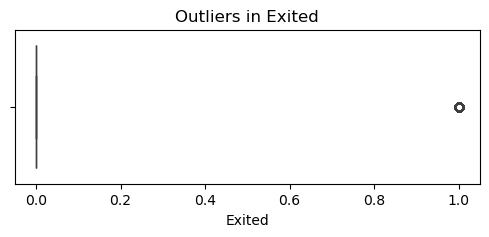

In [14]:
column = ['CreditScore', 'Age', 'Tenure', 'Balance',
'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

for i in column:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=data[i])
    plt.title(f"Outliers in {i}")
    plt.show()

# Encoding

In [15]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [16]:
# encoding in geography
data = pd.get_dummies(data, columns=['Geography'], drop_first=True, dtype=int)


In [17]:
# encoding in gender
data['Gender'] = data['Gender'].map({'Female':0, 'Male':1})

In [18]:
data.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0


# Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# we don't need to do scaling in other columns bcoz their data in already in 0 and 1 

ss = StandardScaler()
scale_data = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
data[scale_data] = ss.fit_transform(data[scale_data])


In [21]:
data.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0


# Split the data in x and Y

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = data.iloc[:,[0,2,3,4,5,8]].values
y = data['Exited']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)

# Apply ML Algorithm & Train the data 

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Predict Testing data

In [27]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Check Accuracy

In [28]:
model.score(x_test,y_test)*100

78.9

In [29]:
model.score(x_train,y_train)*100

77.71249999999999

In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.789


# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1552   55]
 [ 367   26]]


# Calculate f1, recall &  precision score

In [32]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [33]:
f1 = f1_score(y_test,y_pred)
print("f1_score is :",f1)

recall = recall_score(y_test,y_pred)
print("recall score is:", recall)

precision = precision_score(y_test, y_pred)
print("precision score is:",precision)

f1_score is : 0.10970464135021098
recall score is: 0.06615776081424936
precision score is: 0.32098765432098764


### So as we are seeing that our data accuracy is not too much good and f1 score is also very low .
### Main problem is that model is missing too much Churn customers and it's detecting only 20% churn and it's missing 314 cases.
### We need to improve it so we are going to use some other techniques.

# Use xgboost algorithm 
- to increase the model accuracy.

In [34]:
from xgboost import XGBClassifier

In [35]:
Model = XGBClassifier(random_state=42)  
Model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# Predict the testing data

In [36]:
y_pred2 = Model.predict(x_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

# Calculate Accuracy 

In [37]:
Model.score(x_test,y_test)*100

83.05

In [38]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred2)*100
print("Accuracy:", accuracy)

Accuracy: 83.05


# Confusion Matrix 

In [39]:
cm2 = confusion_matrix(y_test,y_pred2)
print("Confusion matrix:\n",cm2)

Confusion matrix:
 [[1499  108]
 [ 231  162]]


# Calculate f1, recall &  precision score

In [40]:
f1 = f1_score(y_test,y_pred2)
print("f1_score is :",f1)

recall = recall_score(y_test,y_pred2)
print("recall score is:", recall)

precision = precision_score(y_test, y_pred2)
print("precision score is:",precision)

f1_score is : 0.48868778280542985
recall score is: 0.4122137404580153
precision score is: 0.6


## Now we got good accuracy and good f1, recall, precision score so now our model is good to predict the churn or stay 

## Deployment Code

In [41]:
import pickle

In [42]:
# save the model 
with open('Customer_churn_model.pkl','wb') as file:
    pickle.dump(Model, file)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(ss, f)

In [43]:
model=pickle.load(open('Customer_churn_model.pkl','rb'))
p_pred = model.predict (x)
print (p_pred)

[0 0 1 ... 0 0 0]


In [44]:
result = pd.concat([data,pd.DataFrame(p_pred ,columns = ['Exited'])],axis=1)
display( result)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Exited
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,1
3,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,0,0,0,0
9996,-1.391939,1,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,0,0,0,0
9997,0.604988,0,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,0,0,0
9998,1.256835,1,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,1,1,0,0


# Thank You !